In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/Dharshini_dataset.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


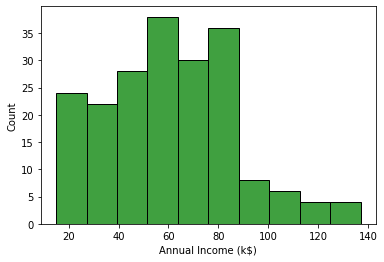

In [3]:
sns.histplot(data['Annual Income (k$)'], color="green")

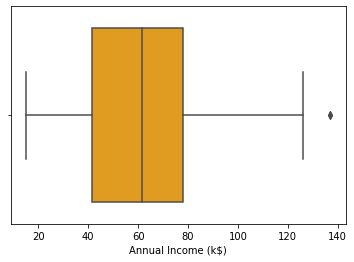

In [4]:
sns.boxplot(data['Annual Income (k$)'], color="orange")

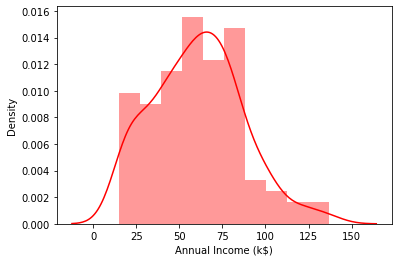

In [5]:
sns.distplot(data['Annual Income (k$)'], color="red")

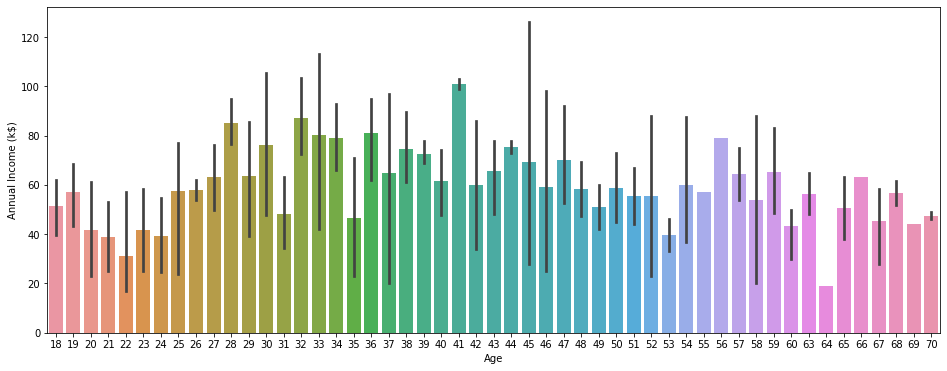

In [6]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

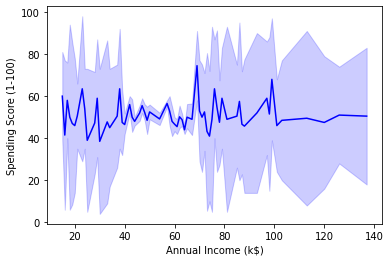

In [7]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="blue")

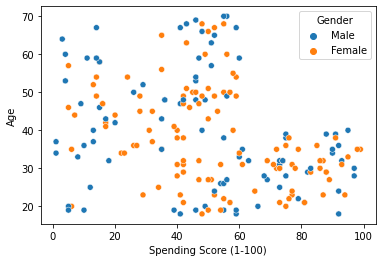

In [8]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])

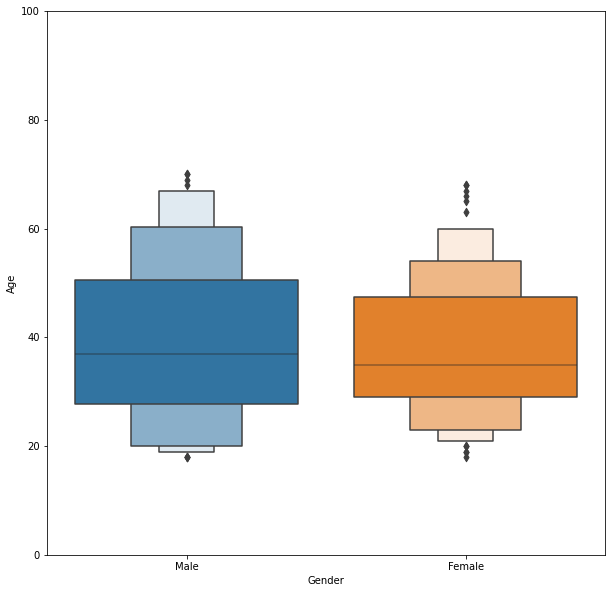

In [9]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)
f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

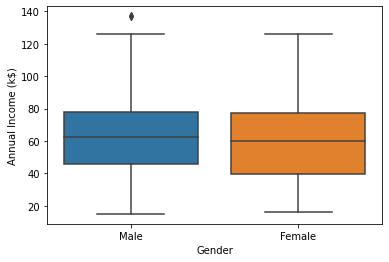

In [10]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

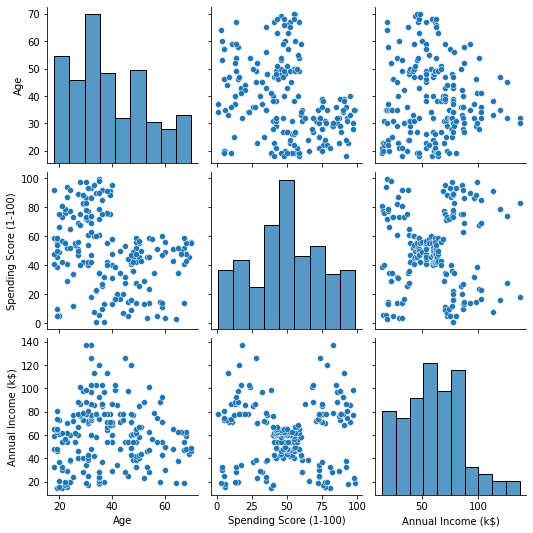

In [11]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

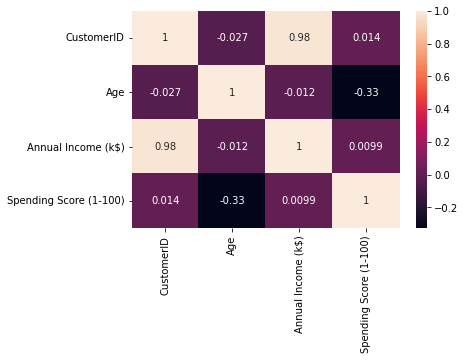

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [15]:
data.shape

(200, 5)

In [16]:
data.isnull().any() #Inference: The dataset has no null values

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37f4c5efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37f4c63a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37f4c5e9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f37f4c68590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f37f4c68ad0>],
 'means': []}

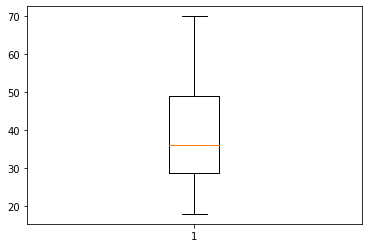

In [19]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37f4c4bbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37f4bd2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37f4c4b610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f37f4bda190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f37f4bda6d0>],
 'means': []}

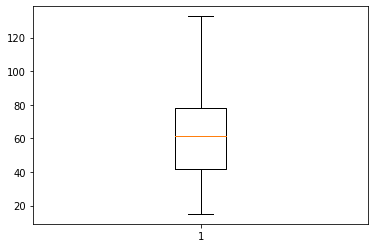

In [20]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37f4bbb5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37f4bc3090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37f4bb3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f37f4bc3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f37f4b4d0d0>],
 'means': []}

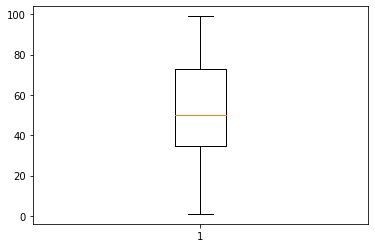

In [21]:
plt.boxplot(data['Spending Score (1-100)'])

In [22]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [23]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [25]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([0, 0, 7, 7, 7, 7, 4, 7, 2, 7, 2, 7, 4, 7, 6, 0, 7, 0, 2, 7, 0, 0,
       4, 0, 4, 0, 4, 0, 4, 7, 2, 7, 2, 0, 4, 7, 4, 7, 4, 7, 4, 0, 2, 7,
       4, 7, 4, 7, 7, 7, 4, 0, 7, 2, 4, 2, 4, 2, 7, 2, 2, 0, 4, 4, 2, 0,
       4, 4, 0, 7, 2, 4, 4, 4, 2, 0, 4, 0, 7, 4, 2, 0, 2, 4, 7, 2, 4, 7,
       7, 4, 4, 0, 2, 4, 7, 0, 4, 7, 2, 0, 7, 4, 2, 0, 2, 7, 4, 2, 2, 2,
       2, 7, 4, 0, 7, 7, 4, 4, 4, 4, 0, 1, 3, 5, 7, 3, 6, 5, 2, 5, 6, 5,
       7, 3, 6, 3, 1, 5, 6, 3, 1, 5, 7, 3, 6, 5, 2, 3, 1, 5, 6, 5, 1, 3,
       1, 3, 6, 3, 6, 3, 1, 3, 6, 3, 6, 3, 6, 3, 1, 5, 6, 5, 6, 5, 1, 3,
       2, 5, 2, 5, 1, 3, 6, 3, 1, 5, 1, 5, 1, 3, 1, 3, 6, 3, 1, 3, 1, 5,
       6, 5], dtype=int32)

In [26]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [27]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,0
2,0.0,0.038462,0.008493,0.051020,7
3,0.0,0.096154,0.008493,0.775510,7
4,0.0,0.250000,0.016985,0.397959,7


In [28]:
data1['kclus'].unique()

array([0, 7, 4, 2, 6, 1, 3, 5], dtype=int32)

In [29]:
data1['kclus'].value_counts()

7    37
4    37
2    29
0    24
3    22
5    18
6    17
1    16
Name: kclus, dtype: int64

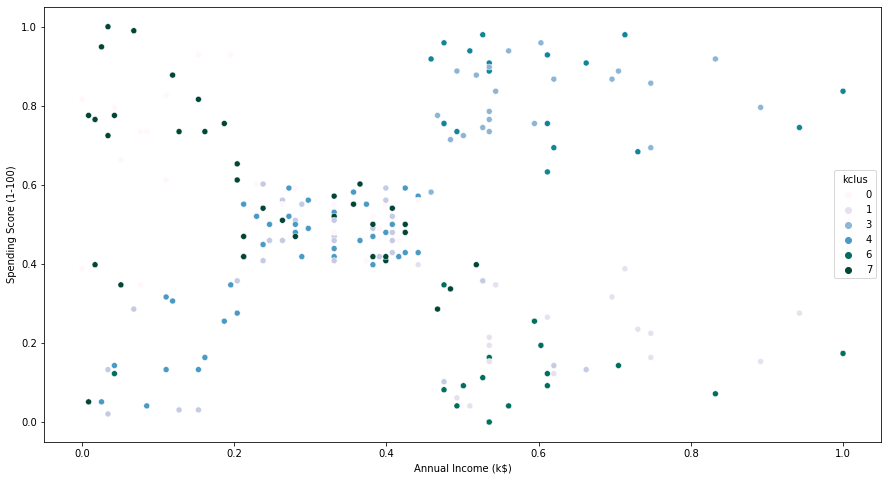

In [30]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [31]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [32]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,0
1,0
2,7
3,7
4,7


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [34]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [35]:
y_train.head()

,kclus
116,4
67,4
78,7
42,2
17,0


In [36]:
y_test.head()

,kclus
58,7
40,4
34,4
102,2
184,1


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[4.48360537],
       [3.52911751],
       [4.12084922],
       [1.84695721],
       [4.34363488]])

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  4.476559382308534
The Root mean squared error is:  2.115788123208119
The Mean absolute error is:  1.7529940811240103
The accuracy is:  0.1340812542952704
